## Data Insights - RFM Analysis Assessment

#### Importing Libraries

In [1]:
#Libraries for Wrangling
import pandas as pd
import numpy as np

#Libraries for Excel operations
import xlrd
import openpyxl
##from pyxlsb import convert_date
import datetime, time

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Data from Excel sheets

In [6]:
#loading the data
df1 = pd.read_excel('Transactions.xlsx', index = False)

In [8]:
df2 = pd.read_excel('CustomerDemographic.xlsx', index = False)

In [93]:
df3 = pd.read_excel('NewCustomerList.xlsx', index = False)

In [157]:
df4 = pd.read_excel('CustomerAddress.xlsx', index = False)

In [10]:
#summarising the data
#df1.head()
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  int64         
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
#Merging the Transactions and Customer Demographic Tables

In [13]:
df12 = df1.merge(df2, on = 'customer_id', how = 'left')

In [33]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  datetime64[ns]
 4   online_order                         19445 non-null  int64         
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

### RFM Analysis

In [31]:
df12['Recency'] = max_Date - df12.transaction_date
df12['Recency'] = df12['Recency'].dt.days.astype('int16')

In [32]:
df12.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Recency
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,65.0,308
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,41.0,223
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,...,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,43.0,75
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,...,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,58.0,121
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90


In [34]:
df_ag = df12.groupby('customer_id').agg({
    'Recency':'min',
    'product_id':'count',
    'Profit':'sum'
})

In [35]:
df_ag

,Recency,product_id,Profit
customer_id,,,
1,7,11,3018.090000
2,128,3,2226.260000
3,102,7,3290.210000
4,195,2,220.570000
5,16,6,2394.940000
...,...,...,...
3497,52,3,1648.320000
3498,127,6,3147.330000
3499,51,7,4955.250000


In [36]:
df_ag = df_ag.rename( columns = {
    'product_id':'Frequency',
    'Profit':'Monetary'})

In [37]:
df_ag['r_quartile'] = pd.qcut(df_ag['Recency'], 4, ['1','2','3','4'])
df_ag['f_quartile'] = pd.qcut(df_ag['Frequency'], 4, ['4','3','2','1'])
df_ag['m_quartile'] = pd.qcut(df_ag['Monetary'], 4, ['4','3','2','1'])

In [39]:
df_ag.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,1,1,2
2,128,3,2226.26,4,4,3
3,102,7,3290.21,4,2,2
4,195,2,220.57,4,4,4
5,16,6,2394.94,1,2,3


In [40]:
df_ag['RFM_Score'] = df_ag.r_quartile.astype(str)+ df_ag.f_quartile.astype(str) + df_ag.m_quartile.astype(str)
df_ag.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
customer_id,,,,,,,
1,7,11,3018.09,1,1,2,112
2,128,3,2226.26,4,4,3,443
3,102,7,3290.21,4,2,2,422
4,195,2,220.57,4,4,4,444
5,16,6,2394.94,1,2,3,123


In [49]:
df_ag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 1 to 5034
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Recency     3492 non-null   int16   
 1   Frequency   3492 non-null   int64   
 2   Monetary    3492 non-null   float64 
 3   r_quartile  3492 non-null   category
 4   f_quartile  3492 non-null   category
 5   m_quartile  3492 non-null   category
 6   RFM_Score   3492 non-null   int32   
dtypes: category(3), float64(1), int16(1), int32(1), int64(1)
memory usage: 112.9 KB


In [48]:
df_ag['RFM_Score'] = df_ag.RFM_Score.astype(int)

#### Customer segmentation via RFM Score

In [60]:
df_ag['CustomerTitle'] = df_ag['RFM_Score'].apply( lambda x: 'Platinum' if x > 411 else ( 'Gold' if x<=411 and x > 311 else ('Silver' if x<=311 and x > 211 else 'Bronze' )))

In [61]:
df_ag.head(100)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,CustomerTitle
customer_id,,,,,,,,
1,7,11,3018.09,1,1,2,112,Bronze
2,128,3,2226.26,4,4,3,443,Platinum
3,102,7,3290.21,4,2,2,422,Platinum
4,195,2,220.57,4,4,4,444,Platinum
5,16,6,2394.94,1,2,3,123,Bronze
...,...,...,...,...,...,...,...,...
96,70,3,1135.25,3,4,4,344,Gold
97,102,8,4911.21,4,1,1,411,Gold
98,141,4,1620.75,4,4,4,444,Platinum


In [62]:
df_cust = df_ag

In [63]:
df_cust

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,CustomerTitle
customer_id,,,,,,,,
1,7,11,3018.090000,1,1,2,112,Bronze
2,128,3,2226.260000,4,4,3,443,Platinum
3,102,7,3290.210000,4,2,2,422,Platinum
4,195,2,220.570000,4,4,4,444,Platinum
5,16,6,2394.940000,1,2,3,123,Bronze
...,...,...,...,...,...,...,...,...
3497,52,3,1648.320000,3,4,4,344,Gold
3498,127,6,3147.330000,4,2,2,422,Platinum
3499,51,7,4955.250000,3,2,1,321,Gold


### Plots

In [73]:
df_v1 =  df_cust.groupby('CustomerTitle').agg({
    'RFM_Score':'count'
}).reset_index()

df_v1

,CustomerTitle,RFM_Score
0,Bronze,1064
1,Gold,807
2,Platinum,832
3,Silver,789


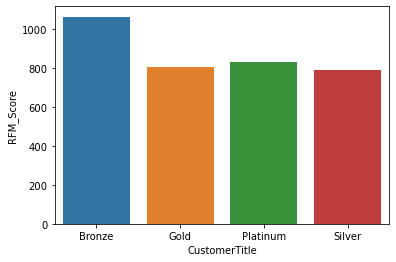

In [74]:
sns.barplot(x="CustomerTitle", y="RFM_Score", data=df_v1)

In [170]:
df_v12 =  df_cust.groupby('CustomerTitle').agg({
    'r_quartile':'min',
    'f_quartile':'min',
    'm_quartile':'min'
}).reset_index()

df_v12

,CustomerTitle,r_quartile,f_quartile,m_quartile
0,Bronze,1,4,4
1,Gold,3,4,4
2,Platinum,4,4,4
3,Silver,2,4,4


In [171]:
df_v12 = pd.melt(df_v12, id_vars="CustomerTitle", var_name="Quartile", value_name="RFM_Score")

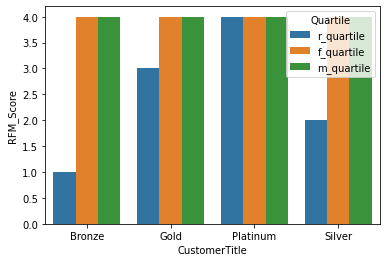

In [172]:
sns.barplot(x='CustomerTitle', y='RFM_Score', hue='Quartile', data=df_v12)

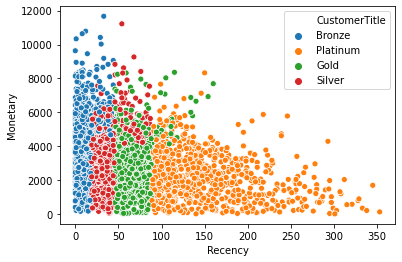

In [173]:
sns.scatterplot(data=df_cust, x="Recency", y="Monetary", hue="CustomerTitle")

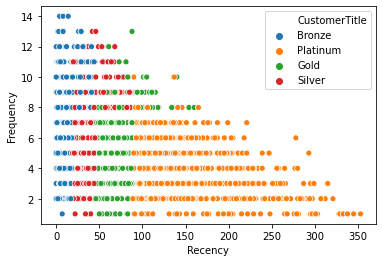

In [174]:
sns.scatterplot(data=df_cust, x="Recency", y="Frequency", hue="CustomerTitle")

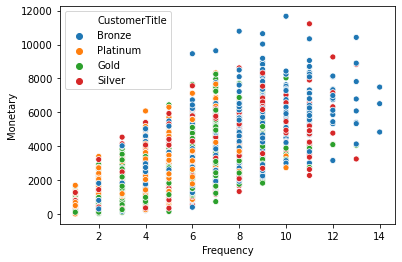

In [175]:
sns.scatterplot(data=df_cust, x="Frequency", y="Monetary", hue="CustomerTitle")

### Plots for Age distribution

In [77]:
df2_2 = df2

In [80]:
df2_2['Age'].unique()

array([67, 39, 66, 47, 32, 26, 65, 37, 20, 19, 40, 42, 43, 52, 57, 25, 34,
       64, 41, 38, 44, 45, 27, 60, 54, 24, 53, 55, 18, 35, 48, 31, 46, 59,
       22, 63, 23, 30, 21, 28, 56, 33, 36, 49, 61, 62, 51, 29, 50, 58, 76,
       88, 85, 77], dtype=int64)

In [81]:
df2_2['AgeCategory'] = df2_2['Age'].apply( lambda x: '70+' if x >= 70 else ( '50-69' if x<= 69 and x > 50 else ('30-49' if x<= 50 and x > 30 else '20s' )))

In [83]:
df2_2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,AgeCategory
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,67,50-69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39,30-49
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,66,50-69
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,47,30-49
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,32,30-49


In [90]:
df_v2 = df2_2.groupby('AgeCategory').agg({
    'Age':'count'
})

In [91]:
df_v2.Age

AgeCategory
20s       552
30-49    1458
50-69     763
70+         4
Name: Age, dtype: int64

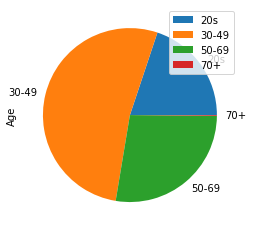

In [92]:
df_v2.plot.pie(y = 'Age')

In [103]:
df3.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Rank,Value,Age,AgeCategory
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.7000,0.8750,0.743750,1,1.718750,63,50-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.89,0.8900,1.1125,0.945625,1,1.718750,50,30-49
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.0100,1.0100,1.010000,1,1.718750,46,30-49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.0875,1.0875,1.087500,4,1.703125,41,30-49
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.52,0.5200,0.6500,0.650000,4,1.703125,55,50-69


In [95]:
df3_3 = df3

In [97]:
df3_3['Age'].unique()

array([63, 50, 46, 41, 55, 69, 44, 47, 48, 35, 25, 21, 43, 56, 27, 81, 66,
       51, 38, 68, 54, 59, 33, 45, 64, 70, 26, 39, 40, 37, 78, 53, 20, 24,
       36, 49, 42, 77, 29, 80, 58, 73, 57, 74, 67, 30, 19, 71, 52, 34, 31,
       65, 28, 82, 76, 62, 23, 79, 61, 72, 32, 75, 22, 18, 60],
      dtype=int64)

In [98]:
df3_3['AgeCategory'] = df3_3['Age'].apply( lambda x: '70+' if x >= 70 else ( '50-69' if x<= 69 and x > 50 else ('30-49' if x<= 50 and x > 30 else '20s' )))

In [99]:
df_v22 = df3_3.groupby('AgeCategory').agg({
    'Age':'count'
})

In [100]:
df_v22

,Age
AgeCategory,
20s,148
30-49,243
50-69,239
70+,85


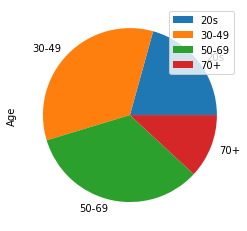

In [102]:
df_v22.plot.pie(y = 'Age')

In [106]:
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2777 non-null   int64         
 1   first_name                           2777 non-null   object        
 2   last_name                            2777 non-null   object        
 3   gender                               2777 non-null   object        
 4   past_3_years_bike_related_purchases  2777 non-null   int64         
 5   DOB                                  2777 non-null   datetime64[ns]
 6   job_title                            2777 non-null   object        
 7   job_industry_category                2777 non-null   object        
 8   wealth_segment                       2777 non-null   object        
 9   deceased_indicator                   2777 non-null   object        
 10  owns_car    

### Plots for Job Industry distribution

In [108]:
df_v31 = df2_2.groupby('job_industry_category').agg({
    'customer_id':'count'
})
df_v31

,customer_id
job_industry_category,
Argiculture,97
Entertainment,116
Financial Services,661
Health,528
IT,123
Manufacturing,670
Property,229
Retail,296
Telecommunications,57


In [112]:
df3_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    object        
 10  tenure        

In [113]:
df_v32 =df3_3.groupby('job_industry_category').agg({
    'first_name':'count'
})
df_v32

,first_name
job_industry_category,
Argiculture,23
Entertainment,32
Financial Services,182
Health,135
IT,29
Manufacturing,171
Property,49
Retail,73
Telecommunications,21


In [122]:
df_v3 = df_v31.merge(df_v32, on = 'job_industry_category', how = 'inner')
df_v3.reset_index()
df_v3 = df_v3.rename ( columns = {
    'customer_id':'Old_Customers',
    'first_name':'New_Customers'
} )

In [130]:
df_v3 = df_v3.reset_index()

In [138]:
df_v3

,job_industry_category,Old_Customers,New_Customers
0,Argiculture,97,23
1,Entertainment,116,32
2,Financial Services,661,182
3,Health,528,135
4,IT,123,29
5,Manufacturing,670,171
6,Property,229,49
7,Retail,296,73
8,Telecommunications,57,21


In [140]:
df_v3 = pd.melt(df_v3, id_vars="job_industry_category", var_name="CustomerType", value_name="CustomerCount")

In [165]:
#df_v3

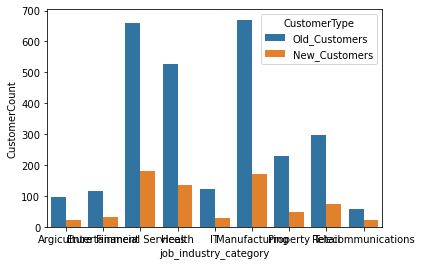

In [143]:
sns.barplot(x='job_industry_category', y='CustomerCount', hue='CustomerType', data=df_v3)

In [144]:
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2777 non-null   int64         
 1   first_name                           2777 non-null   object        
 2   last_name                            2777 non-null   object        
 3   gender                               2777 non-null   object        
 4   past_3_years_bike_related_purchases  2777 non-null   int64         
 5   DOB                                  2777 non-null   datetime64[ns]
 6   job_title                            2777 non-null   object        
 7   job_industry_category                2777 non-null   object        
 8   wealth_segment                       2777 non-null   object        
 9   deceased_indicator                   2777 non-null   object        
 10  owns_car    

#### Plots for Wealth Segment by Customers

In [119]:
df_v41 = df2_2.groupby('wealth_segment').agg({
    'customer_id':'count'
})
df_v41

,customer_id
wealth_segment,
Affluent Customer,684
High Net Worth,710
Mass Customer,1383


In [120]:
df_v42 = df3_3.groupby('wealth_segment').agg({
    'first_name':'count'
})
df_v42

,first_name
wealth_segment,
Affluent Customer,173
High Net Worth,180
Mass Customer,362


In [124]:
df_v4 = df_v41.merge(df_v42, on = 'wealth_segment', how = 'inner')
df_v4.reset_index()
df_v4 = df_v4.rename ( columns = {
    'customer_id':'Old_Customers',
    'first_name':'New_Customers'
} )

In [133]:
df_v4 = df_v4.reset_index()

In [145]:
df_v4 = pd.melt(df_v4, id_vars="wealth_segment", var_name="CustomerType", value_name="CustomerCount")

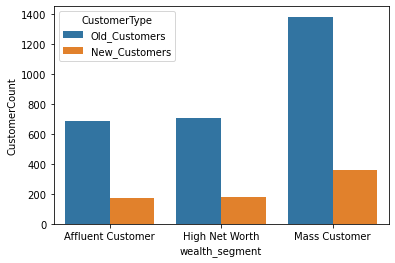

In [147]:
sns.barplot(x='wealth_segment', y='CustomerCount', hue='CustomerType', data=df_v4)

#### Plots for Age by Gender

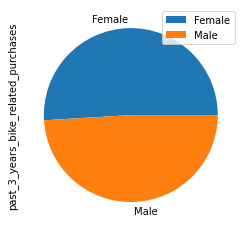

In [155]:
df_v51 = df2_2.groupby('gender').agg({
    'past_3_years_bike_related_purchases':'sum'
})

df_v51

df_v51.plot.pie(y = 'past_3_years_bike_related_purchases')

In [154]:
df_v52 = df3_3.groupby('gender').agg({
    'past_3_years_bike_related_purchases':'sum'
})

df_v52

,past_3_years_bike_related_purchases
gender,
Female,17876
Male,17736


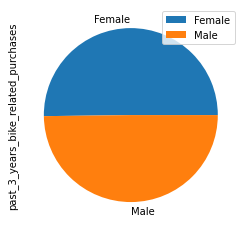

In [156]:
df_v52.plot.pie(y = 'past_3_years_bike_related_purchases')

#### Plots for Property valuation by State

In [158]:
df4

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [162]:
df_v6 = df4.groupby('state').agg({
    'property_valuation':'sum'
})
df_v6 = df_v6.reset_index()

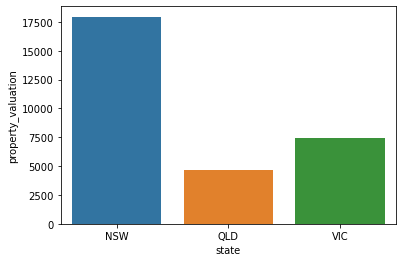

In [163]:
sns.barplot(x="state", y="property_valuation", data=df_v6)